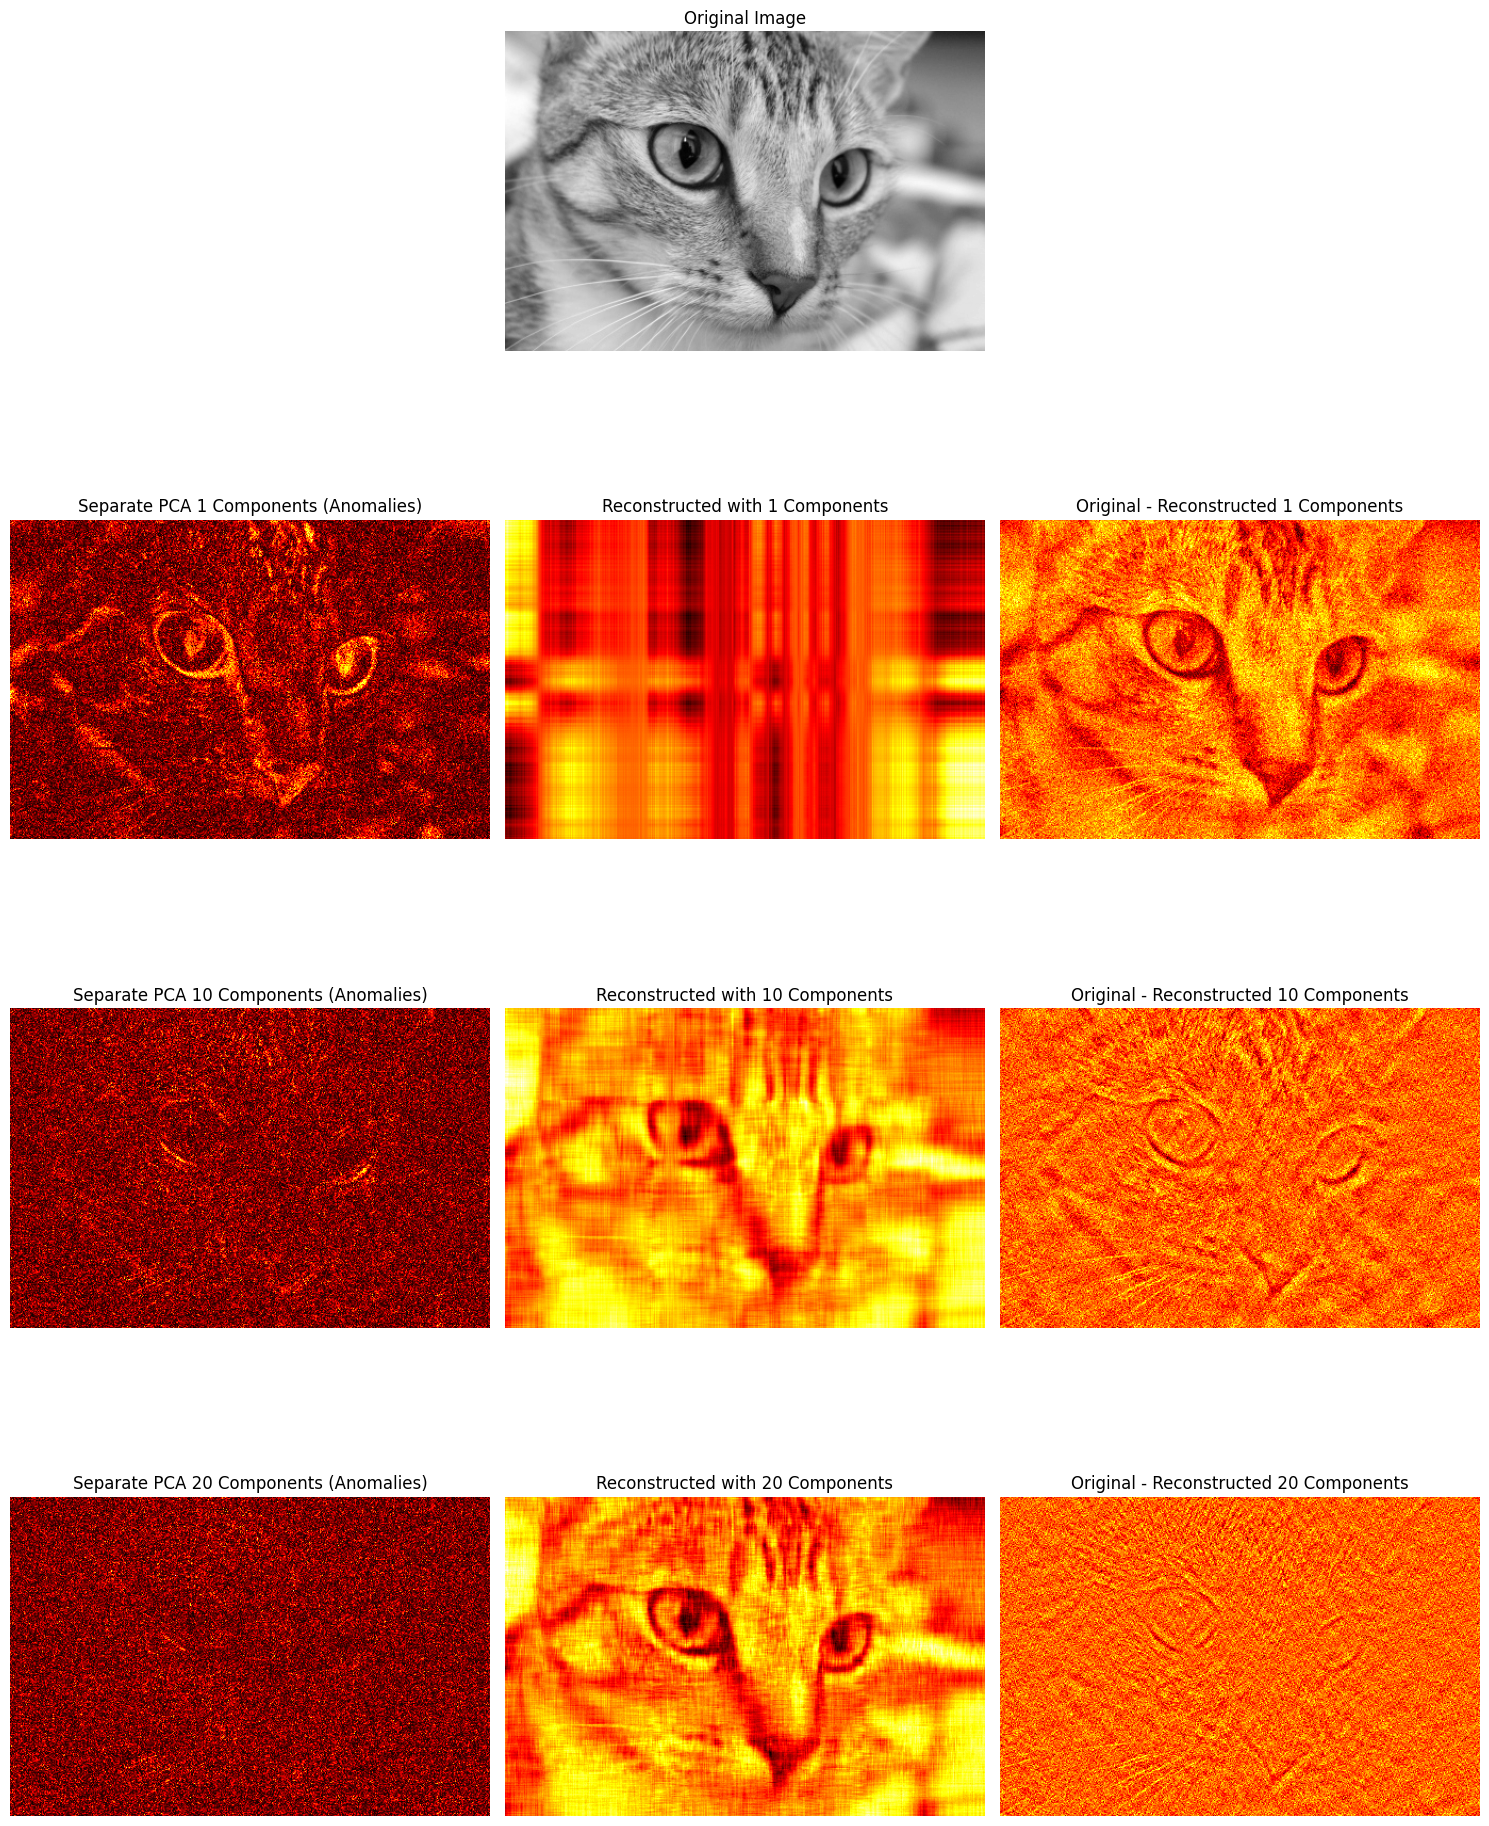

In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage.color import rgb2gray

# Load and process the image
image = data.chelsea()
gray_image = rgb2gray(image)

# Add noise to the image
np.random.seed(42)
noise = np.random.normal(0, 0.1, gray_image.shape)
noisy_image = gray_image + noise
noisy_image = np.clip(noisy_image, 0, 1)

# Get the dimensions of the image
h, w = noisy_image.shape
X = noisy_image.reshape(h, w)

# Define the number of components for Separate PCA
separate_components = [1, 10, 20]

# Create a figure to show the original image at the top and the rest below
plt.figure(figsize=(15, 20))

# Plot the original image at the top
plt.subplot(len(separate_components) + 1, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# --- Separate PCA ---
for i, n_components in enumerate(separate_components):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    
    # Reshape to image
    reconstructed_image = X_reconstructed.reshape(h, w)
    anomalies = np.abs(noisy_image - reconstructed_image)
    original_minus_reconstruction = noisy_image - reconstructed_image
    
    # Display anomalies using 'hot' colormap
    plt.subplot(len(separate_components) + 1, 3, 3*(i+1) + 1)
    plt.imshow(anomalies, cmap='hot')  # Use the 'hot' colormap to highlight differences
    plt.title(f'Separate PCA {n_components} Components (Anomalies)')
    plt.axis('off')
    
    # Display the reconstructed image using 'hot' colormap
    plt.subplot(len(separate_components) + 1, 3, 3*(i+1) + 2)
    plt.imshow(reconstructed_image, cmap='hot')  # Use the 'hot' colormap for reconstruction as well
    plt.title(f'Reconstructed with {n_components} Components')
    plt.axis('off')

    # Display the difference (Original - Reconstructed)
    plt.subplot(len(separate_components) + 1, 3, 3*(i+1) + 3)
    plt.imshow(original_minus_reconstruction, cmap='hot')  # Difference visualization
    plt.title(f'Original - Reconstructed {n_components} Components')
    plt.axis('off')

plt.tight_layout()
plt.show()


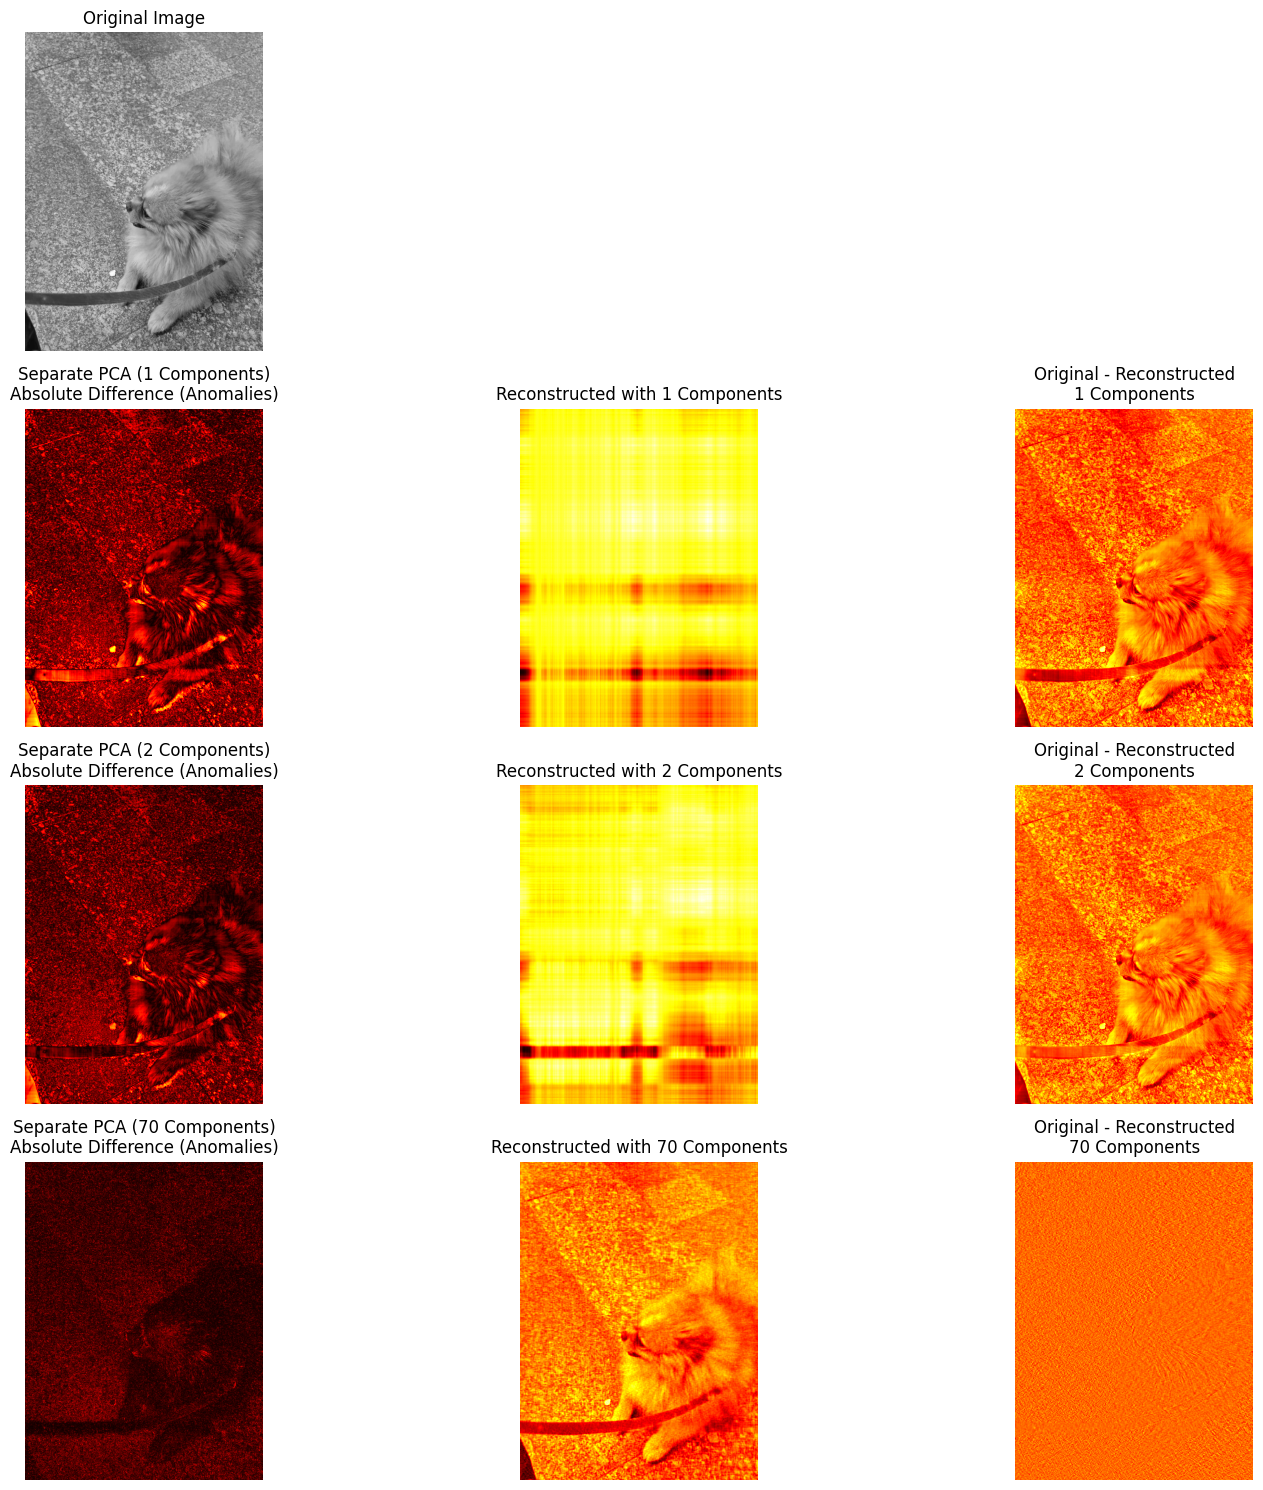

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image

# Load a custom image from your local system
# Provide the file path to your high-quality image
image_path = '/Users/esmaelmoataz/Documents/test1/dogs/ahmed shahat dog.jpg'  # Replace with the path to your image
image = Image.open(image_path)

# Convert the image to grayscale
gray_image = image.convert('L')  # Convert to grayscale ('L' mode in PIL)
gray_image = np.array(gray_image) / 255.0  # Normalize to 0-1 range

# Get the dimensions of the image
h, w = gray_image.shape
X = gray_image.reshape(h, w)

# Define the number of components for Separate PCA
separate_components = [1, 2, 70]

plt.figure(figsize=(15, 15))

# Show the original image
plt.subplot(len(separate_components)+1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# --- Apply PCA for each number of components ---
for i, n_components in enumerate(separate_components):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)

    # Calculate absolute differences (anomalies) and the difference (Original - PCA)
    anomalies = np.abs(gray_image - X_reconstructed)  # Absolute difference (heatmap)
    image_minus_pca = gray_image - X_reconstructed    # Raw difference (directional)

    # Plot absolute difference (anomalies) using a heatmap
    plt.subplot(len(separate_components)+1, 3, 3*(i+1) + 1)
    plt.imshow(anomalies, cmap='hot')
    plt.title(f'Separate PCA ({n_components} Components)\nAbsolute Difference (Anomalies)')
    plt.axis('off')

    # Plot the reconstructed image using a heatmap
    plt.subplot(len(separate_components)+1, 3, 3*(i+1) + 2)
    plt.imshow(X_reconstructed, cmap='hot')
    plt.title(f'Reconstructed with {n_components} Components')
    plt.axis('off')

    # Plot the raw difference (Original - PCA)
    plt.subplot(len(separate_components)+1, 3, 3*(i+1) + 3)
    plt.imshow(image_minus_pca, cmap='hot')
    plt.title(f'Original - Reconstructed\n{n_components} Components')
    plt.axis('off')

plt.tight_layout()
plt.show()
